In [5]:
import zipfile

# Nama file zip yang sudah diunggah
filezip = "mobil&motor.zip"

# Ekstrak file zip
with zipfile.ZipFile(filezip, 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [8]:
from PIL import Image
import os

# Mendapatkan daftar file dari direktori gambar
image_dir = 'train/mobil'
file_list = os.listdir(image_dir)

# Mengubah semua gambar menjadi mode RGBA
for file_name in file_list:
    # Membuka gambar
    image_path = os.path.join(image_dir, file_name)
    image = Image.open(image_path)

    # Pengecekan mode gambar
    if image.mode == 'P':
        image = image.convert('RGBA')
        alpha = image.split()[-1]
        image.putalpha(alpha)
        image.save(image_path)

# Mendapatkan daftar file dari direktori gambar
image_dir = 'train/motor'
file_list = os.listdir(image_dir)

# Mengubah semua gambar menjadi mode RGBA
for file_name in file_list:
    # Membuka gambar
    image_path = os.path.join(image_dir, file_name)
    image = Image.open(image_path)

    # Pengecekan mode gambar
    if image.mode == 'P':
        image = image.convert('RGBA')
        alpha = image.split()[-1]
        image.putalpha(alpha)
        image.save(image_path)

# Mendapatkan daftar file dari direktori gambar
image_dir = 'test/mobil'
file_list = os.listdir(image_dir)

# Mengubah semua gambar menjadi mode RGBA
for file_name in file_list:
    # Membuka gambar
    image_path = os.path.join(image_dir, file_name)
    image = Image.open(image_path)

    # Pengecekan mode gambar
    if image.mode == 'P':
        image = image.convert('RGBA')
        alpha = image.split()[-1]
        image.putalpha(alpha)
        image.save(image_path)

# Mendapatkan daftar file dari direktori gambar
image_dir = 'test/motor'
file_list = os.listdir(image_dir)

# Mengubah semua gambar menjadi mode RGBA
for file_name in file_list:
    # Membuka gambar
    image_path = os.path.join(image_dir, file_name)
    image = Image.open(image_path)

    # Pengecekan mode gambar
    if image.mode == 'P':
        image = image.convert('RGBA')
        alpha = image.split()[-1]
        image.putalpha(alpha)
        image.save(image_path)

In [9]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="test", target_size=(224,224))

Found 997 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

In [12]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

In [13]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [14]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

In [15]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

In [16]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [17]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [18]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [19]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [20]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [21]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [22]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [23]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [24]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [25]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [26]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [27]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [28]:
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [29]:
model.add(Flatten())

In [30]:
model.add(Dense(units=4096,activation="relu"))

In [31]:
model.add(Dense(units=4096,activation="relu"))

In [32]:
model.add(Dense(units=2, activation="softmax"))

In [33]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [35]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16",monitor='val_acc', verbose=1, save_best_only=True,save_weights_only=False, save_freq='epoch') # simpan setiap epoch
early = EarlyStopping(monitor='val_acc',min_delta=0, patience=20,verbose=1)

In [36]:
hist = model.fit(traindata, steps_per_epoch=100, validation_data=testdata, validation_steps=10, epochs=100, callbacks=[checkpoint, early])

Epoch 1/100
 32/100 [========>.....................] - ETA: 1:17:31 - loss: 371.7092 - accuracy: 0.5045

100/100 [==============================] - 2382s 23s/step - loss: 371.7092 - accuracy: 0.5045 - val_loss: 0.6932 - val_accuracy: 0.4906


In [37]:
model.save('vgg16')

1/1 [==============================] - 1s 746ms/step
[[0.49635243 0.5036475 ]]
Motor


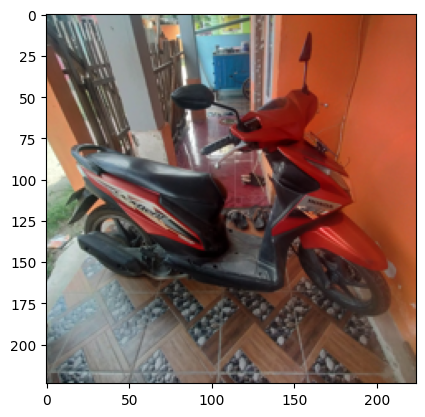

In [69]:
from PIL import Image

img = Image.open("IMG_20230518_154214.jpg")
img = img.resize((224, 224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

from keras.models import load_model
saved_model = load_model("vgg16")

output = saved_model.predict(img)
print(output)
if output[0][0] > output[0][1]:
    print("Mobil")
else:
    print('Motor')